<a href="https://colab.research.google.com/github/ryoojunsang/2023S-Ajou-ML/blob/main/vgg_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical
import pickle

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def load_rand():
    X=[]
    dir_path='/content/drive/MyDrive/MACHINE/fruit_images'
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(sub_dir)
        path_main=os.path.join(dir_path,sub_dir)
        i=0
        for sub_dir2 in tqdm(os.listdir(path_main)):
          path_main2=os.path.join(path_main,sub_dir2)
          i=0
          for img_name in os.listdir(path_main2):
              if i>=6:
                  break
              img=cv2.imread(os.path.join(path_main2,img_name))
              img=cv2.resize(img,(100,100))
              img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
              X.append(img)
              i+=1
    return X

In [3]:
X=load_rand()

  0%|          | 0/2 [00:00<?, ?it/s]

fresh



 50%|█████     | 1/2 [00:22<00:22, 22.24s/it]

rotten



100%|██████████| 2/2 [00:27<00:00, 13.83s/it]


In [4]:
X=np.array(X)
X.shape

(36, 100, 100, 3)

In [5]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        list_fruits=['freshwatermelone', 'freshstrawberry', 'freshtomato', 'rottenwatermelone', 'rottenstrawberry', 'rottentomato']
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//6])
            elif title and Y is not None:
                ax[i//6][i%6].set_title(Y[i])
        plt.show()
    else:
        print('Cannot plot')

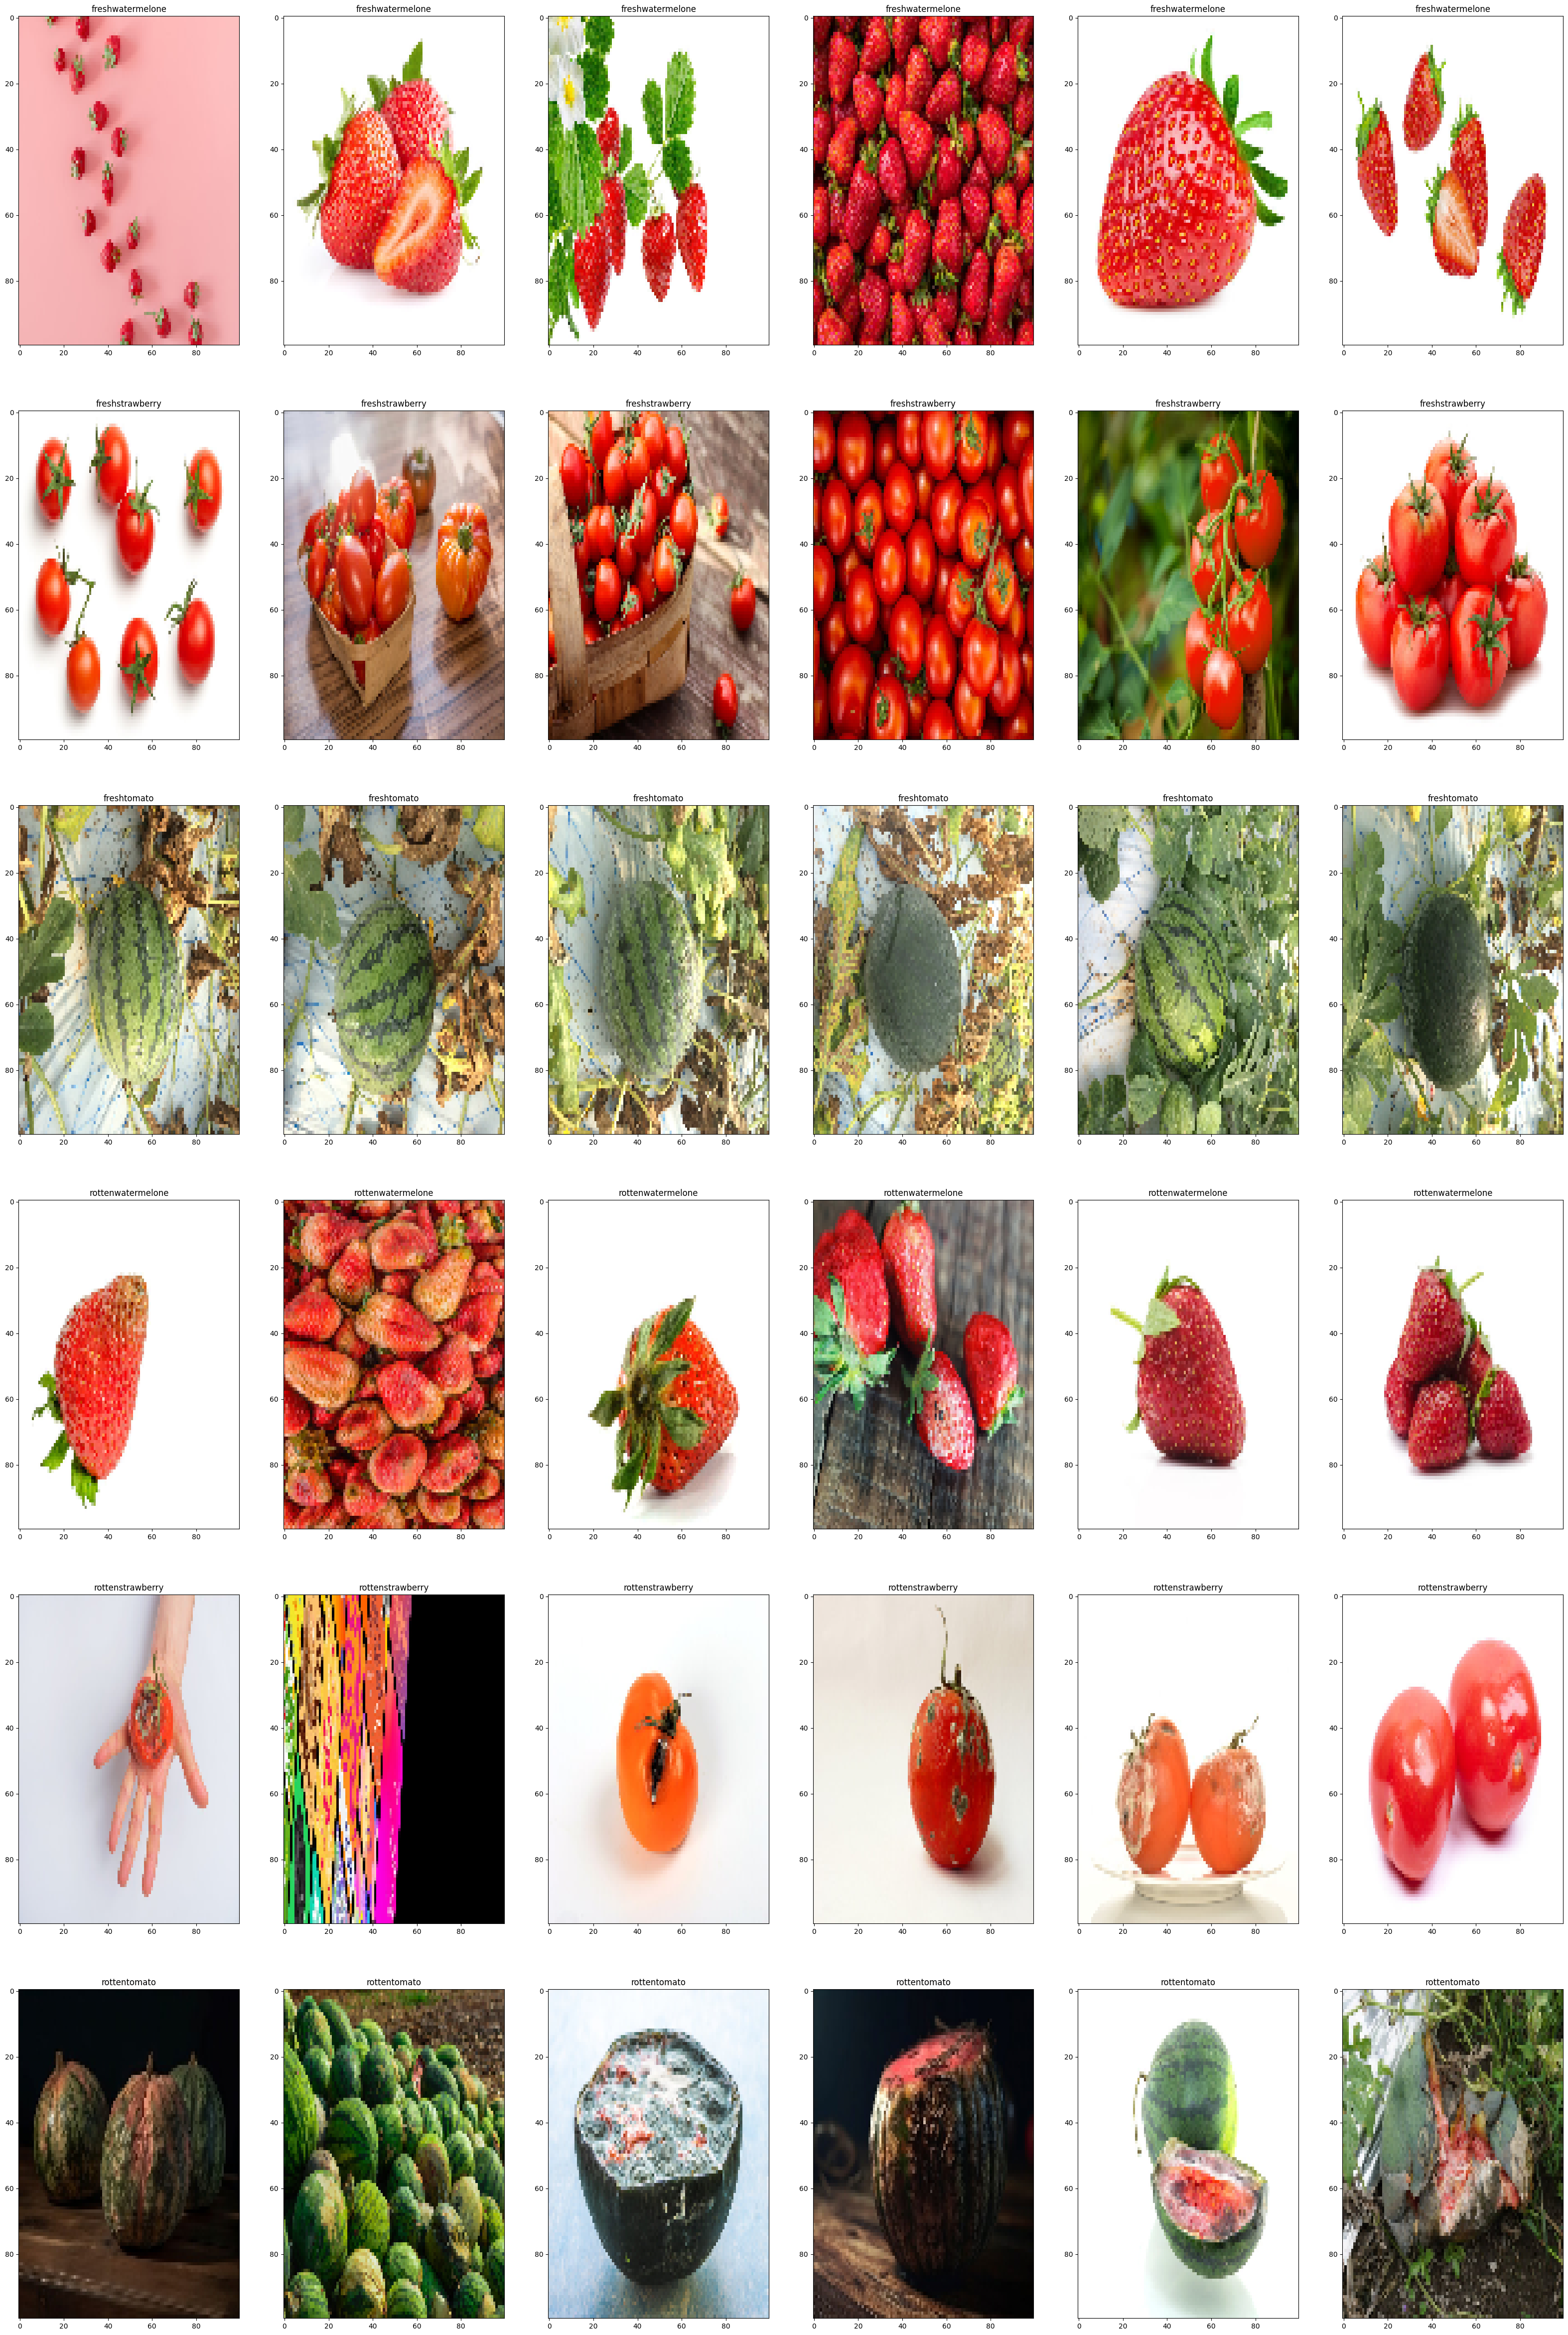

In [6]:
show_subpot(X)

In [7]:
del X

# Rotten vs fresh

In [8]:
def load_rottenvsfresh():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    main_dir = '/content/drive/MyDrive/MACHINE/fruit_images'
    for cata in tqdm(os.listdir(main_dir)):
        print(cata)
        if quality[0] == cata:
            path_main=os.path.join(main_dir,cata)
            for img_dir in os.listdir(path_main):
                tmp_dir = os.path.join(path_main, img_dir)
                for img_name in os.listdir(tmp_dir):
                    img=cv2.imread(os.path.join(tmp_dir,img_name))
                    img=cv2.resize(img,(100,100))
                    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    z.append([img,0])
        else:
            path_main=os.path.join(main_dir,cata)
            for img_dir in os.listdir(path_main):
                tmp_dir = os.path.join(path_main, img_dir)
                for img_name in os.listdir(tmp_dir):
                    img=cv2.imread(os.path.join(tmp_dir,img_name))
                    img=cv2.resize(img,(100,100))
                    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [9]:
X,Y=load_rottenvsfresh()

  0%|          | 0/2 [00:00<?, ?it/s]

fresh


 50%|█████     | 1/2 [00:53<00:53, 53.86s/it]

rotten


100%|██████████| 2/2 [01:16<00:00, 38.28s/it]


Shuffling your data.....


100%|██████████| 951/951 [00:00<00:00, 1240293.25it/s]


In [10]:
Y=np.array(Y)
X=np.array(X)
print(X)
print(Y)

[[[[149  41  34]
   [143   8  10]
   [159  42  44]
   ...
   [ 98 100  65]
   [108  99  53]
   [ 10  10   1]]

  [[186  45  48]
   [210  72  76]
   [153  23  28]
   ...
   [ 52  30   1]
   [ 98  56   9]
   [ 68  55  30]]

  [[151  18  10]
   [163  10   9]
   [176  40  45]
   ...
   [ 95  71  28]
   [133  90  33]
   [143 131  91]]

  ...

  [[192  10   7]
   [196  34  22]
   [172   3   5]
   ...
   [143  14   9]
   [139  21  15]
   [181  22  15]]

  [[183  14   7]
   [184   3   2]
   [111   5   1]
   ...
   [140  23   9]
   [128   5   9]
   [204  70  58]]

  [[171   8   3]
   [143  12   8]
   [ 87   1   0]
   ...
   [147  13  10]
   [109   3   7]
   [170  34  27]]]


 [[[210 208 213]
   [212 209 212]
   [210 208 211]
   ...
   [227 230 235]
   [228 230 235]
   [231 231 234]]

  [[214 212 217]
   [212 210 213]
   [210 208 211]
   ...
   [227 230 235]
   [228 230 234]
   [230 230 233]]

  [[214 212 217]
   [210 208 211]
   [211 209 212]
   ...
   [228 231 236]
   [227 231 235]
   [231 232

In [11]:
y_ser=pd.Series(Y)
y_ser.value_counts()

0    494
1    457
dtype: int64

In [12]:
def load_rottenvsfresh_valset():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    main_dir = '/content/drive/MyDrive/MACHINE/fruit_images'
    for cata in tqdm(os.listdir(main_dir)):
        print(cata)
        if quality[0] == cata:
            path_main=os.path.join(main_dir,cata)
            for img_dir in os.listdir(path_main):
                tmp_dir = os.path.join(path_main, img_dir)
                for img_name in os.listdir(tmp_dir):
                    img=cv2.imread(os.path.join(tmp_dir,img_name))
                    img=cv2.resize(img,(100,100))
                    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    z.append([img,0])
        else:
            path_main=os.path.join(main_dir,cata)
            for img_dir in os.listdir(path_main):
                tmp_dir = os.path.join(path_main, img_dir)
                for img_name in os.listdir(tmp_dir):
                    img=cv2.imread(os.path.join(tmp_dir,img_name))
                    img=cv2.resize(img,(100,100))
                    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                    z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [13]:
X_val,Y_val=load_rottenvsfresh_valset()

  0%|          | 0/2 [00:00<?, ?it/s]

fresh


 50%|█████     | 1/2 [00:51<00:51, 51.01s/it]

rotten


100%|██████████| 2/2 [00:53<00:00, 26.91s/it]


Shuffling your data.....


100%|██████████| 951/951 [00:00<00:00, 1190681.52it/s]


In [14]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
y_ser=pd.Series(Y_val)
y_ser.value_counts()

0    494
1    457
dtype: int64

In [16]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

X, Y = load_rottenvsfresh()
X = np.array(X)
Y = np.array(Y)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

X_train = X_train / 255.0
X_test = X_test / 255.0

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

base_model.trainable = False

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=32, epochs=20, validation_data=(X_test, Y_test))

loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)



  0%|          | 0/2 [00:00<?, ?it/s]

fresh


 50%|█████     | 1/2 [01:00<01:00, 60.32s/it]

rotten


100%|██████████| 2/2 [01:04<00:00, 32.06s/it]


Shuffling your data.....


100%|██████████| 951/951 [00:00<00:00, 1398101.33it/s]


Epoch 1/20
24/24 [==============================] - 73s 3s/step - loss: 0.5634 - accuracy: 0.7592 - val_loss: 0.4396 - val_accuracy: 0.8272
Epoch 2/20
24/24 [==============================] - 71s 3s/step - loss: 0.3295 - accuracy: 0.8539 - val_loss: 0.3870 - val_accuracy: 0.8220
Epoch 3/20
24/24 [==============================] - 72s 3s/step - loss: 0.2348 - accuracy: 0.9053 - val_loss: 0.3331 - val_accuracy: 0.8534
Epoch 4/20
24/24 [==============================] - 71s 3s/step - loss: 0.1734 - accuracy: 0.9263 - val_loss: 0.2846 - val_accuracy: 0.8901
Epoch 5/20
24/24 [==============================] - 77s 3s/step - loss: 0.1290 - accuracy: 0.9539 - val_loss: 0.3109 - val_accuracy: 0.8953
Epoch 6/20
24/24 [==============================] - 71s 3s/step - loss: 0.1335 - accuracy: 0.9579 - val_loss: 0.2773 - val_accuracy: 0.9005
Epoch 7/20
24/24 [==============================] - 78s 3s/step - loss: 0.0769 - accuracy: 0.9776 - val_loss: 0.2971 - val_accuracy: 0.9110
Epoch 8/20
24/24 [==

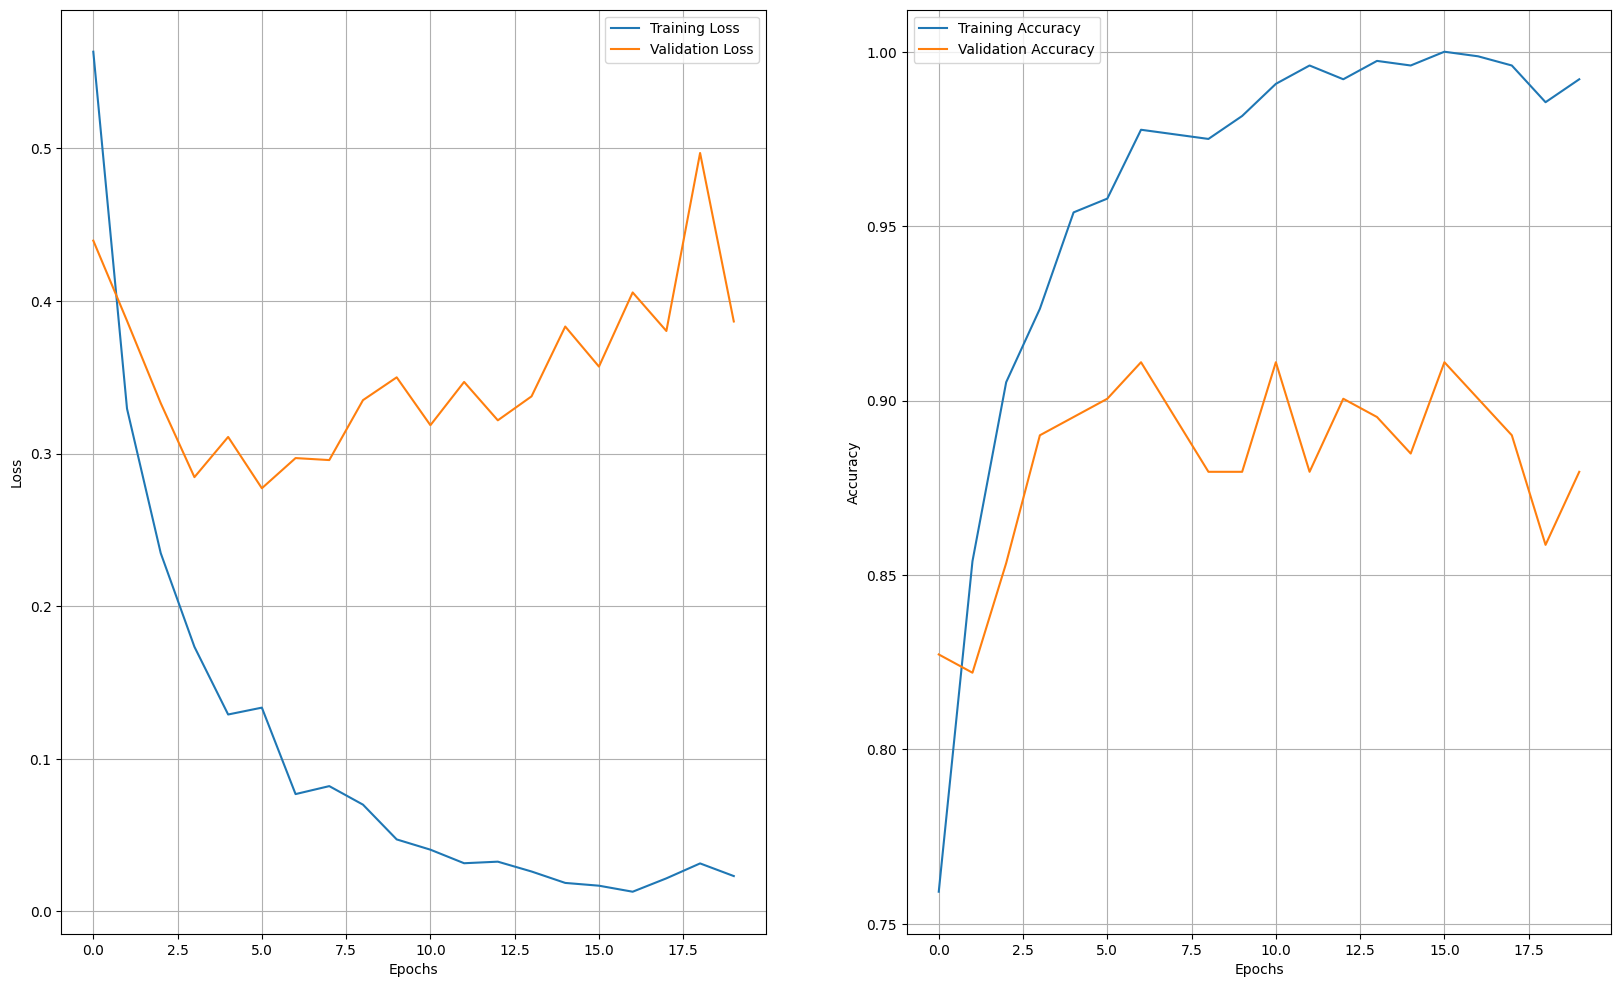

In [17]:
# Loss 그래프
plt.figure(1, figsize=(20, 12))
plt.subplot(1, 2, 1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.grid(True)
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.grid(True)
plt.legend()